In [31]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import geocoder as gd

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
read_csdata = pd.read_csv('casasgdl.csv')

read_csdata.head()

,web-scraper-order,web-scraper-start-url,price,bedrooms,bathrooms,area,address,zip-code,colony,city,state,country
0,1689263544-1,https://propiedades.com/guadalajara/casas-vent...,2064000,3.0,2.0,200.0,NaN,44320,Monumental,Guadalajara,Jalisco,México
1,1689263544-2,https://propiedades.com/guadalajara/casas-vent...,11885000,3.0,2.0,400.0,NaN,44130,Arcos Vallarta,Guadalajara,Jalisco,México
2,1689263544-3,https://propiedades.com/guadalajara/casas-vent...,1750000,4.0,3.0,153.0,NaN,44970,José Clemente Orozco,Guadalajara,Jalisco,México
3,1689263544-4,https://propiedades.com/guadalajara/casas-vent...,3239275,3.0,2.0,NaN,NaN,44399,Altavista de Guadalajara,Guadalajara,Jalisco,México
4,1689263544-5,https://propiedades.com/guadalajara/casas-vent...,4137655,3.0,2.0,NaN,NaN,44399,Altavista de Guadalajara,Guadalajara,Jalisco,México


In [8]:
read_csdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3600 non-null   object 
 1   web-scraper-start-url  3600 non-null   object 
 2   price                  3600 non-null   int64  
 3   bedrooms               3421 non-null   float64
 4   bathrooms              3371 non-null   float64
 5   area                   3289 non-null   float64
 6   address                3130 non-null   object 
 7   zip-code               3600 non-null   int64  
 8   colony                 3600 non-null   object 
 9   city                   3600 non-null   object 
 10  state                  3600 non-null   object 
 11  country                3600 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 337.6+ KB


In [22]:
df = read_csdata.drop(['web-scraper-order','web-scraper-start-url','address','colony','city','state','country'], axis = 1)

In [35]:
codigo = '44320'

# Utilizar Geocoder para obtener las coordenadas
resultado = gd.osm(codigo)

# Obtener las coordenadas
latitud = resultado.lat
longitud = resultado.lng

# Imprimir las coordenadas
print(f'Latitud: {latitud}')
print(f'Longitud: {longitud}')

Latitud: 47.20225645
Longitud: -2.02990424717857


In [29]:
df.head(50)

,price,bedrooms,bathrooms,area,zip-code
0,2064000,3.0,2.0,200.0,44320
1,11885000,3.0,2.0,400.0,44130
2,1750000,4.0,3.0,153.0,44970
3,3239275,3.0,2.0,NaN,44399
4,4137655,3.0,2.0,NaN,44399
5,4900000,4.0,4.0,NaN,44730
6,5450000,3.0,2.0,NaN,44950
7,856200,2.0,1.0,65.0,44725
8,3943000,3.0,2.0,136.0,44700
9,2300000,2.0,2.0,102.0,44700


<Axes: >

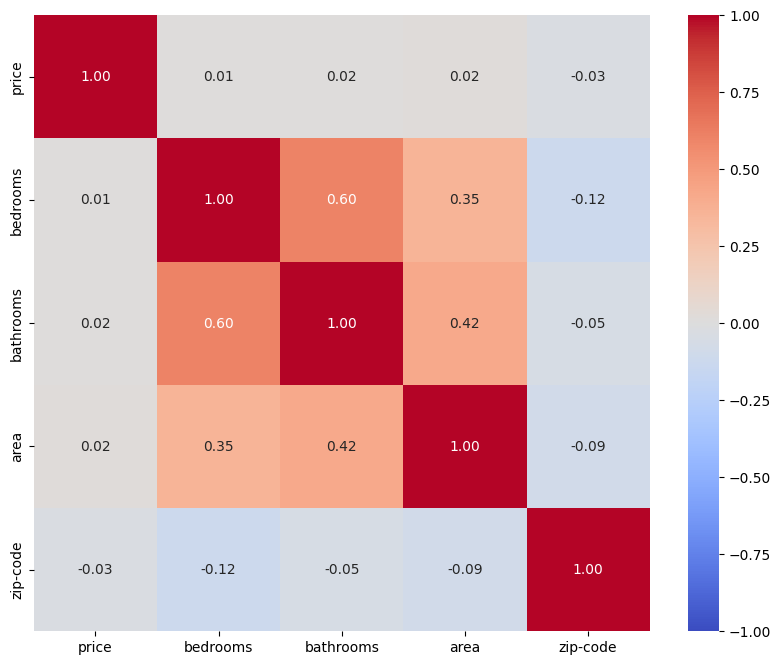

In [26]:
corrmat = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt=".2f", square=True, vmax=1, vmin=-1)


/home/angel/Documentos/LordAngel11/core-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


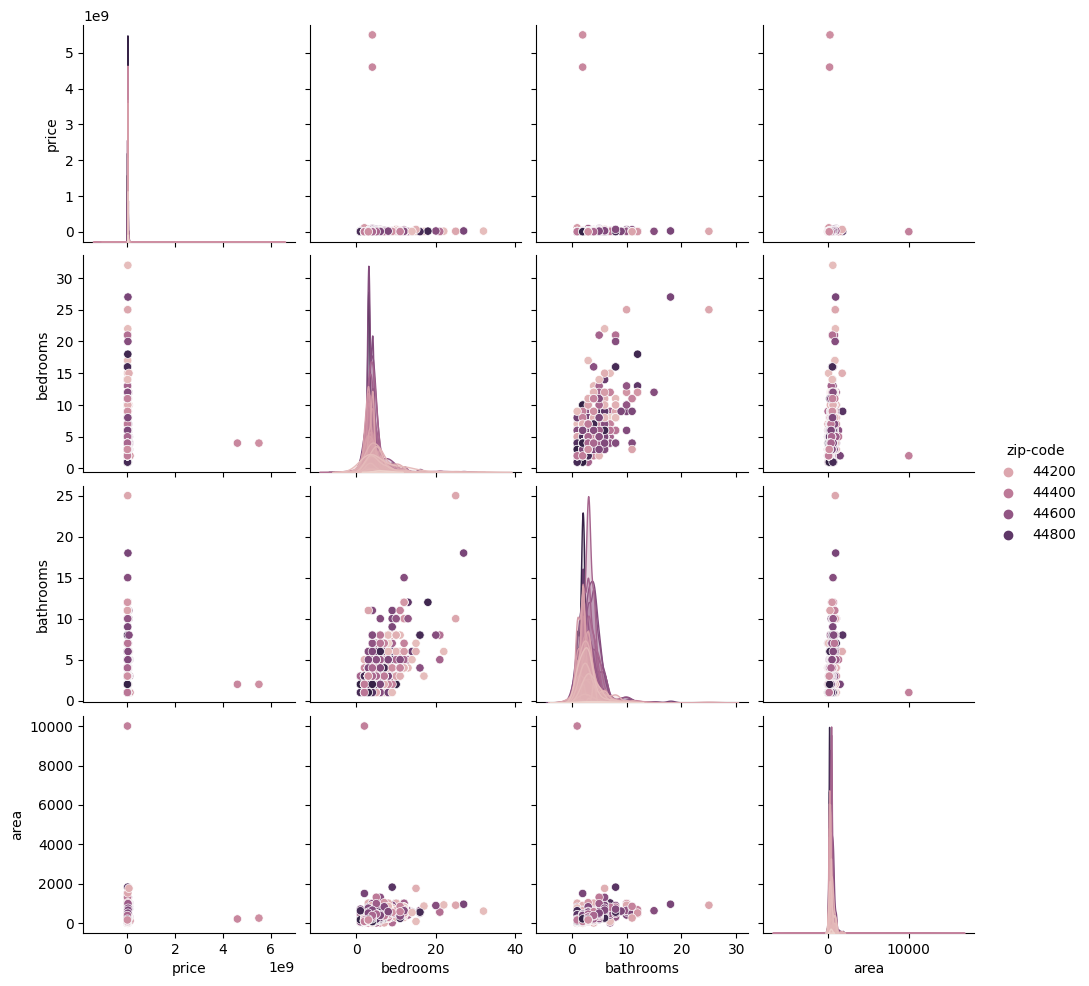

In [30]:
sns.pairplot(read_csdata, hue='zip-code')

/home/angel/Documentos/LordAngel11/core-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


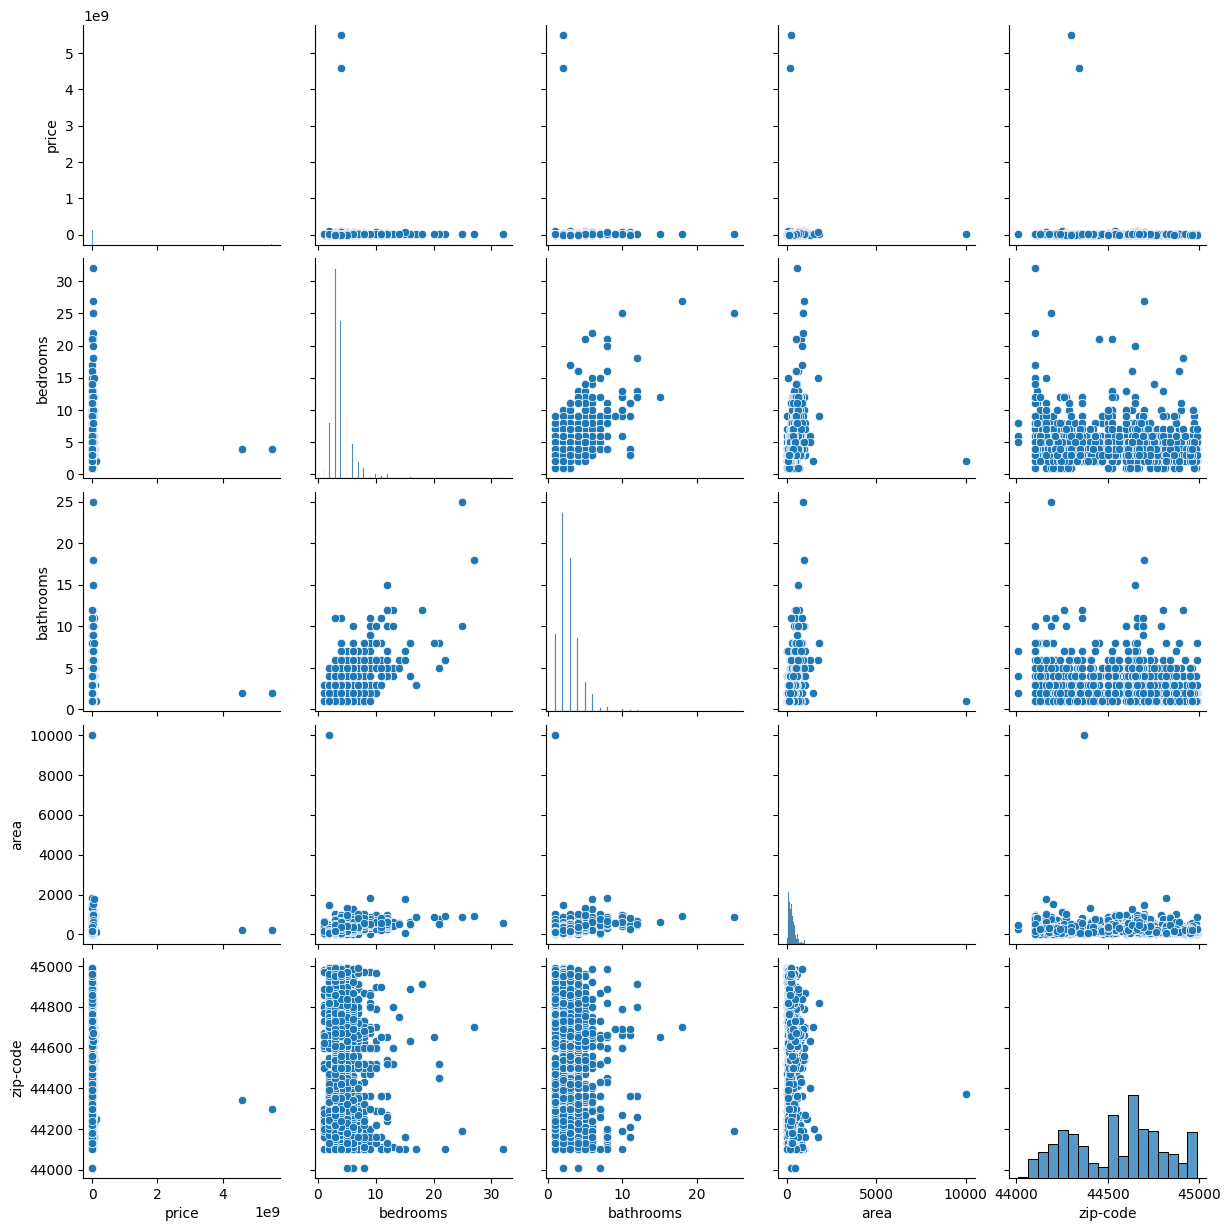

In [14]:
sns.pairplot(read_csdata)

In [37]:
df.head()

,price,bedrooms,bathrooms,area,zip-code
0,2064000,3.0,2.0,200.0,44320
1,11885000,3.0,2.0,400.0,44130
2,1750000,4.0,3.0,153.0,44970
3,3239275,3.0,2.0,NaN,44399
4,4137655,3.0,2.0,NaN,44399
